# Metronome Synchronization


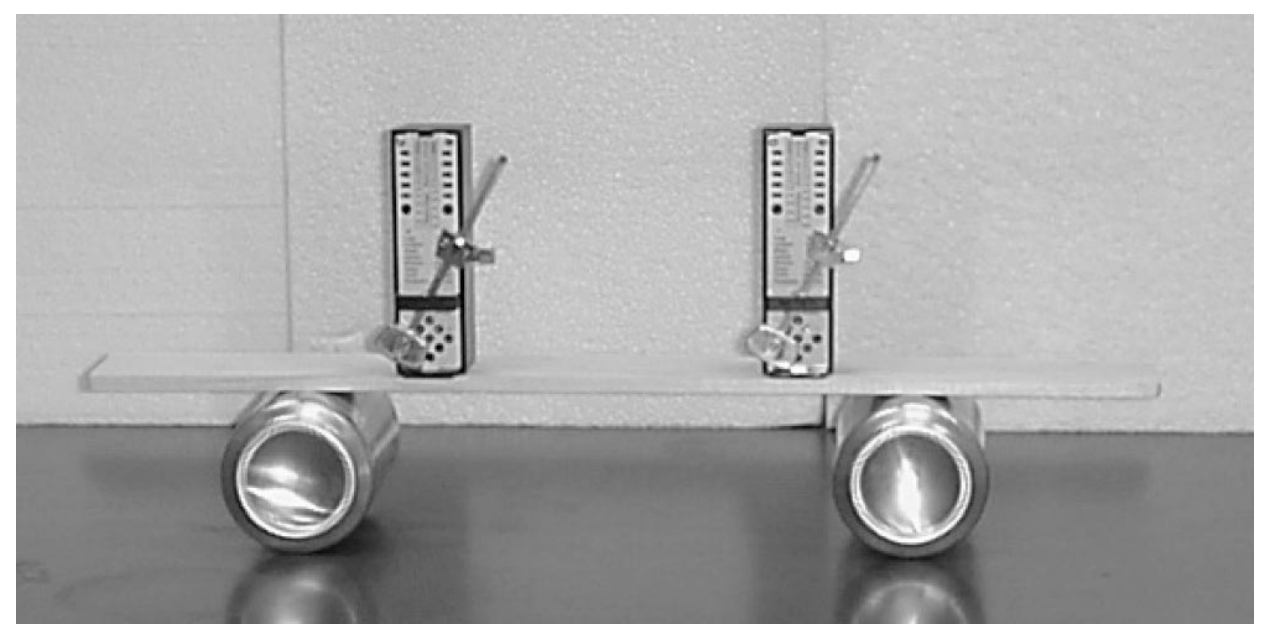

 - Differential equations taken from  the 2002 paper ["Synchronization of Metronomes"](https://aapt.scitation.org/doi/pdf/10.1119/1.1501118) by James Pantaleone
 - Multiple mechanical metronomes are placed on a wooden board on soda cans. Over time, they come into [sync](https://youtu.be/Aaxw4zbULMs), even despite slight differences in the intial frequencies of each. 

## Single Metronome Equations

This is the differential equation modelling a the movement of a single metronome:

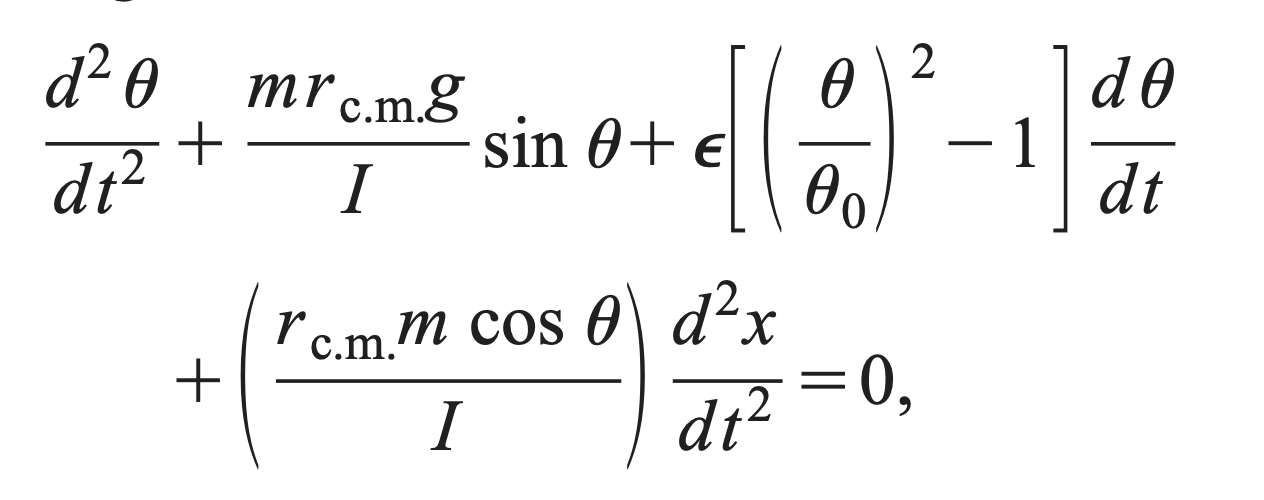

$\frac{d^2 \theta}{dt^2} + \frac{m r_{c.m.}g}{I} \sin\theta + \epsilon \left[\left( \frac{\theta}{\theta_0}\right)^2 - 1 \right] \frac{d \theta}{dt} + \left(\frac{r_{c.m.} m \cos\theta}{I} \right) \frac{d^2x}{dt^2} = 0$
- $\theta$ is the angle of the metronome from 0 at a time t

- $\theta_0$ is a constant describing the typical max $\theta$ value of the pendulum

- $m$ is the mass of the pendulum

- $I$ is the moment of inertia of the pendulum

- $r_{cm}$ is the distance from pivot to the pendulum's center of mass

- $g$ is gravitational constant

- $\epsilon$ models the escapement

- $x$ is the horizontal position of the base, so $\frac{d^2x}{dt^2} = 0$ for one metronome

To better understand the equation, we can analyze each of the terms. The first and second term are the angular acceleration and gravitational torque, respectively. This part of the equation resembles the motion of a pendulum. The third term models the [escapement](https://www.britannica.com/art/metronome). In a mechanical metronome, the escapement is the device that controls the motion, giving it energy at certain points to keep in oscillating at a constant frequency. The fourth term is the force from the base that the metronome is on. With just one metronome, the base doesn't move, so this last term is equal to zero.

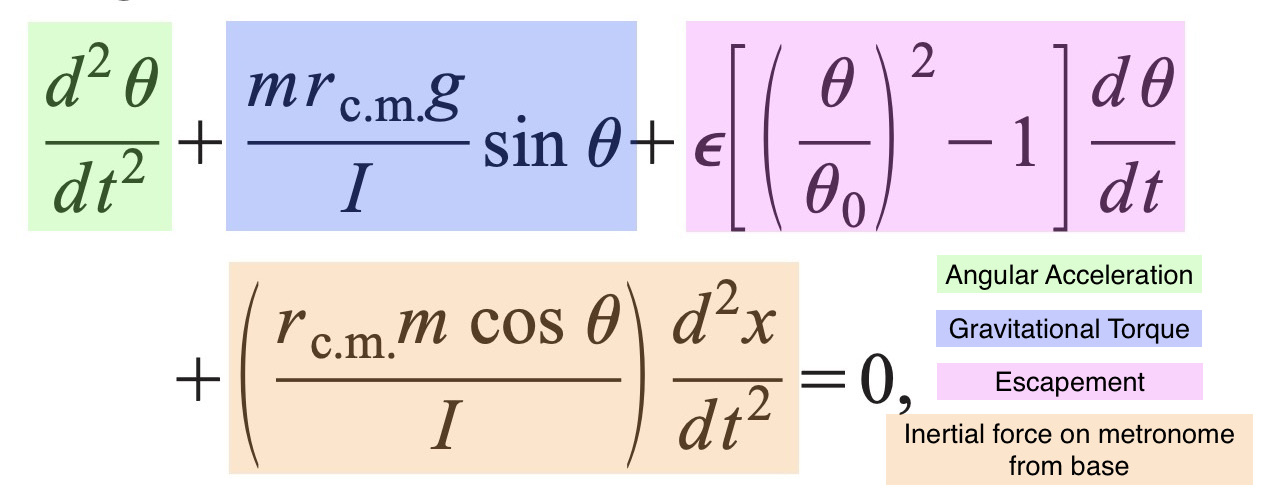 

In order to model this, we had to convert our second order differential equation to a system of first order differential equations. 
$$
\begin{align}
\frac{d \theta}{dt} &= \frac{d \theta}{dt} \\
\frac{d^2 \theta}{dt^2} &= - \frac{m r_{c.m.}g}{I} \sin\theta - \epsilon \left[\left( \frac{\theta}{\theta_0}\right)^2 - 1 \right] \frac{d \theta}{dt} - \left(\frac{r_{c.m.} m \cos\theta}{I} \right) \frac{d^2x}{dt^2} \\
\end{align}
$$

## Model of a Single Metronome

In [91]:
import numpy as np
import pylab as py
import matplotlib as mpl
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def diffeq_solver_from_scipy(s_initial, tmin, tmax, nts, deriv):    # ODE solver
    t = np.linspace(tmin,tmax,nts)
    s = odeint(deriv, s_initial, t)
    return t,s

In [3]:
m = 1   # initialize constants
l = 1
r_cm = 15*l
g = 9.8
I = m*l**2
nts = 500


def onemetplot(escapement, theta0, t):  # set up interactive widget
    escape = escapement   # set constants
    theta0 = theta0*np.pi/180   # theta into radians
    s_initial = [theta0,0,0] # intial conditions
    tmin = t[0]
    tmax = t[1]
    
    def onemet(s,t):  # system of ODEs to solve
        theta = s[0]
        dtheta = s[1]
        d2x = s[2]
        deriv = -m*r_cm*g/I*np.sin(theta) - escape*((theta/theta0)**2-1)*dtheta - r_cm*m/I*np.cos(theta)*d2x
        return (dtheta, deriv,0)
    
    t,s= diffeq_solver_from_scipy(s_initial, 0, tmax, nts, onemet)  # solve for system
    py.plot(t, s[:,0]*180/np.pi)   # plot
    py.xlabel("time(s)")
    py.ylabel("theta")
    py.xlim(tmin,tmax)   # adjust limits of plot
    py.title("Movement of Single Metronome over time")
    py.plot()

# create sliders for variables
escapement = widgets.FloatLogSlider(value=1, base=10, min= -1, max = 2, description='escapement:',disabled=False,
    continuous_update=True, orientation='horizontal', readout=True)
theta0_slider = widgets.FloatSlider(value = 45, min = 1, max = 60, step = 0.1, description = 'theta_0:', desable=False, continuous_update = True, orientation = 'horizontal',readout = True)
tslider = widgets.IntRangeSlider(value=[0,7], min = 0, max=15, step = 1, description = 'Time interval:', readout = True, continuous_update = True)
ui = widgets.VBox([escapement, theta0_slider, tslider])  # holds sliders

out = widgets.interactive_output(onemetplot, {'escapement': escapement, 'theta0':  theta0_slider, 't': tslider})  # outputs graph
display(widgets.HBox([out,ui]))    # displays graph/sliders

## Equation for Two Metronomes
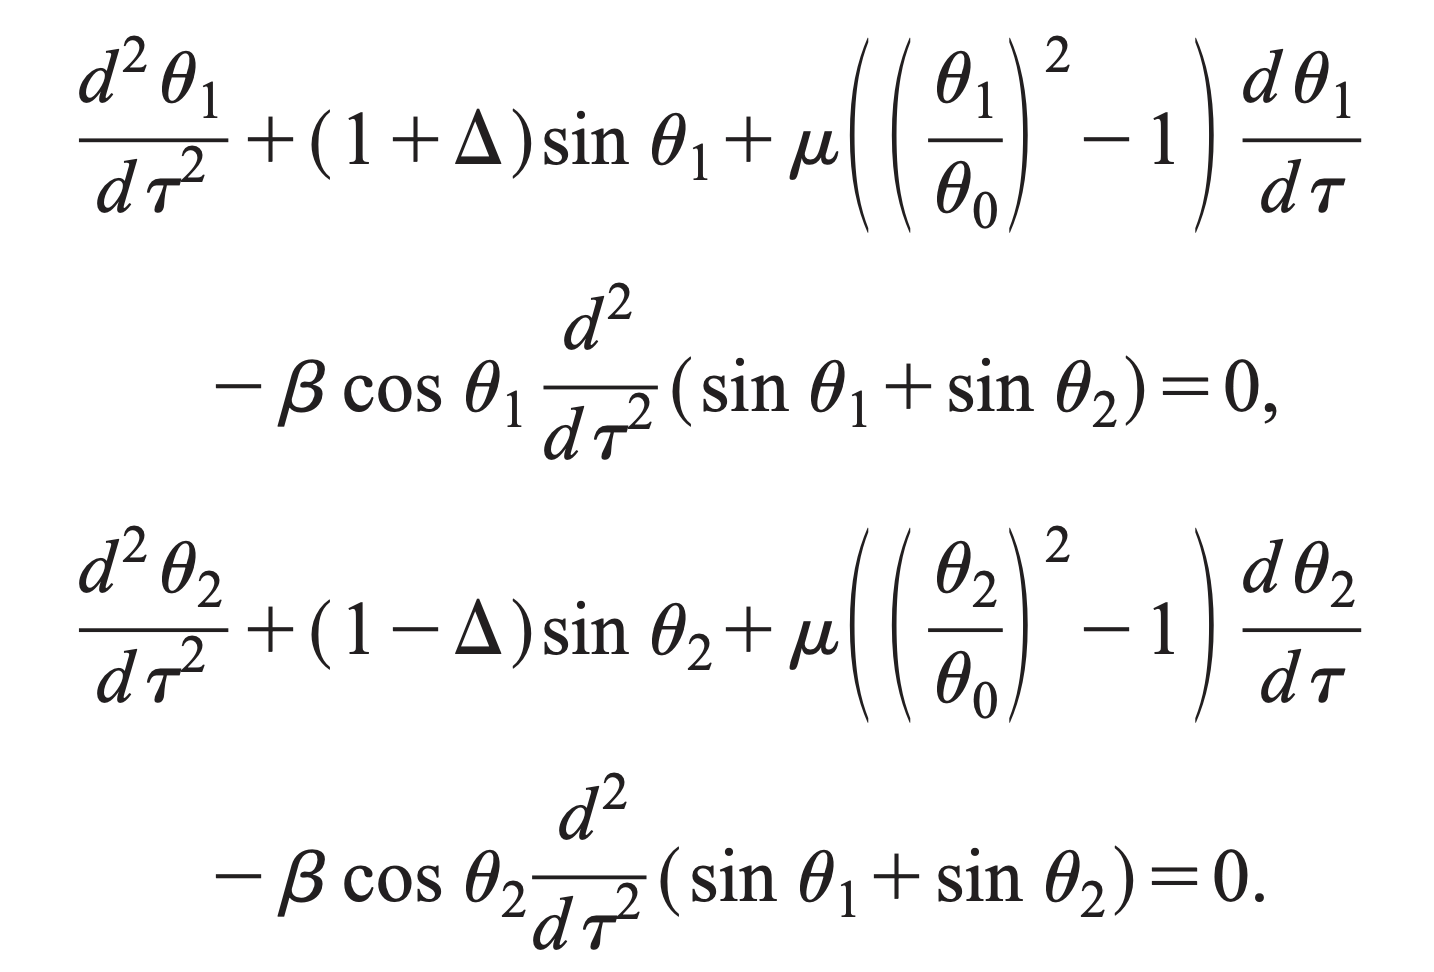


$$
\begin{align}
\frac{d^2 \theta_1}{d\tau^2} + (1 + \Delta) \sin\theta_1 + \mu \left( \left( \frac{\theta_1}{\theta_0}\right)^2 - 1\right) \frac{d\theta_1}{d\tau} - \beta \cos \theta_1 \frac{d^2}{d\tau^2}\left( \sin \theta_1 + \sin \theta_2\right) = 0 \\
\frac{d^2 \theta_2}{d\tau^2} + (1 + \Delta) \sin\theta_2 + \mu \left( \left( \frac{\theta_2}{\theta_0}\right)^2 - 1\right) \frac{d\theta_2}{d\tau} - \beta \cos \theta_2 \frac{d^2}{d\tau^2}\left( \sin \theta_1 + \sin \theta_2\right) = 0 \\
\end{align}
$$

- $\tau$ is a dimensionless time variable $\tau = \omega t$
     - $\omega^2 = \frac{m r_{cm} g}{I}$
- $\Delta$ is the relative frequency difference between the two metronomes
- $\mu$ is a damping constant
- $\beta$ is a coupling constant

These equations look even more complicated than those governing the motion of a single metronome, but they are very similar. The first term, angualr acceleration, is the same, except now it is in terms of $\tau$ instead of time. The choice of shifting from time to $\tau$ makes the entire system independent of the frequency. The second term is still the acceleration due to gravity, however the $\delta$ term is either added or subtracted from it. This introduces instability to the system, so the metronomes never stay in anti-phase synchronization. They [eventually move into phase synchronization](https://youtu.be/5v5eBf2KwF8) since it is more stable than anti-phase synchronization. The third term is a damping term, which helps regulate the shift in amplitude caused by the resonance of the metronomes. The final term is the force due to the base. $\beta$ is the coupling constant, and the force depends on the motion of both metronomes over time.



_two metronomes:_

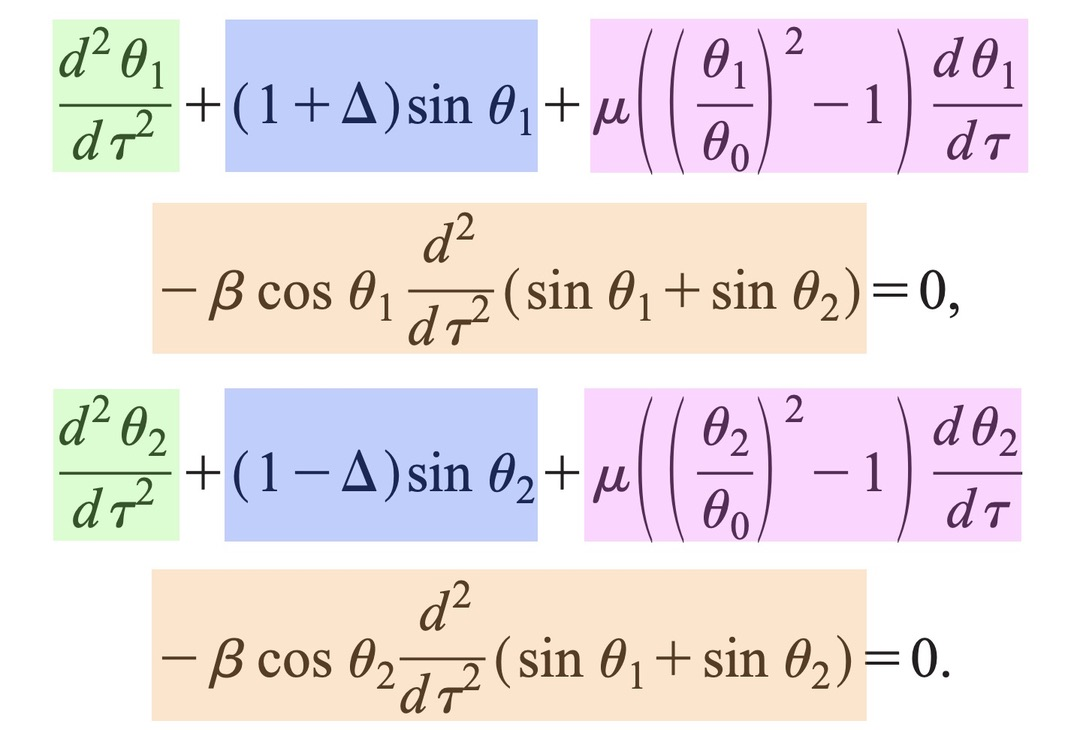


_one metronome:_

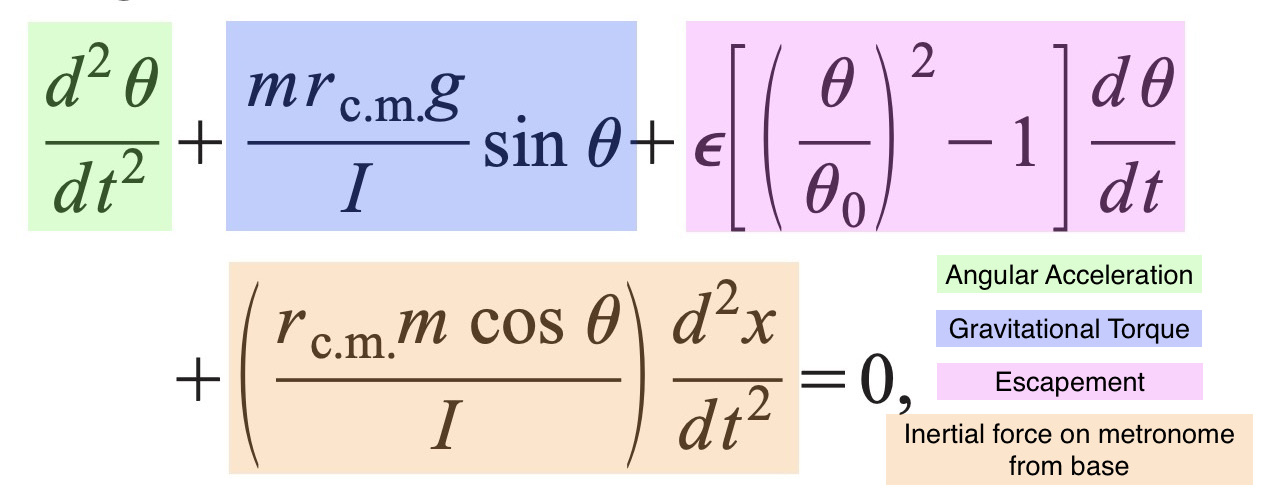

In order to model this system of second order ODEs, we have to convert it to a system of first order ODEs. This would be rather straightforward, but the force term contains$\frac{d^2}{d\tau^2}\left(\sin \theta_1 + \sin \theta_2 \right)$. Since $\theta_1$ and $\theta_2$ are functions of $\tau$, we have to find the second derivative. Thus we have to divide the entire second derivative by $ 1- \beta \cos^2\theta_1$ or $ 1- \beta \cos^2\theta_2$. Fortuantely, this is not an issue, since $\beta$ is much less than 1, so the denominator will never be 0.

The entire system used is shown below:
$$
\begin{align}
\frac{d \theta_1}{d\tau} &=  \frac{d \theta_1}{d\tau}  \\
\frac{d^2 \theta_1}{d\tau^2} &= \frac{ -(1+\Delta)\sin\theta_1 - \mu\left(\left(\frac{\theta_1}{\theta_0}\right)^2-1\right)\frac{d \theta_1}{d\tau} + \beta \cos\theta_1 \left( \cos \theta_2 \frac{d^2 \theta_2}{d\tau^2} - \sin\theta_1 \frac{d \theta_1}{d\tau}^2 - \sin\theta_2\frac{d \theta_2}{d\tau}^2 \right)}{1-\beta \cos^2 \theta_1}\\
\frac{d \theta_2}{d\tau} &=  \frac{d \theta_2}{d\tau}  \\
\frac{d^2 \theta_2}{d\tau^2} &= \frac{ -(1-\Delta)\sin\theta_2 - \mu\left(\left(\frac{\theta_2}{\theta_0}\right)^2-1\right)\frac{d \theta_2}{d\tau} + \beta \cos\theta_2 \left( \cos \theta_1 \frac{d^2 \theta_1}{d\tau^2} - \sin\theta_2 \frac{d \theta_2}{d\tau}^2 - \sin\theta_1\frac{d \theta_1}{d\tau}^2 \right)}{1-\beta \cos^2 \theta_2}\\
\end{align}
$$

Actually, that isn't the system. Since we have $\frac{d^2 \theta_2}{d\tau^2}$ in the second equation and $\frac{d^2 \theta_1}{d\tau^2}$ in the fourth equation, we actually have get one of them not in terms of the other one. That means solving the following equation for $\frac{d^2 \theta_1}{d\tau^2}$:

$$
\begin{align}
\frac{d^2 \theta_1}{d\tau^2} &= \frac{ -(1+\Delta)\sin\theta_1 - \mu\left(\left(\frac{\theta_1}{\theta_0}\right)^2-1\right)\frac{d \theta_1}{d\tau} + \beta \cos\theta_1 \left( \cos \theta_2 \frac{ -(1-\Delta)\sin\theta_2 - \mu\left(\left(\frac{\theta_2}{\theta_0}\right)^2-1\right)\frac{d \theta_2}{d\tau} + \beta \cos\theta_2 \left( \cos \theta_1 \frac{d^2 \theta_1}{d\tau^2} - \sin\theta_2 \frac{d \theta_2}{d\tau}^2 - \sin\theta_1\frac{d \theta_1}{d\tau}^2 \right)}{1-\beta \cos^2 \theta_2} - \sin\theta_) \frac{d \theta_1}{d\tau}^2 - \sin\theta_2\frac{d \theta_2}{d\tau}^2 \right)}{1-\beta \cos^2 \theta_1}
\end{align}
$$

which ends up looking something like this:

$$
\begin{align}
\frac{d^2 \theta_1}{d\tau^2} &= \frac{ -(1+\Delta)\sin\theta_1 - \mu\left(\left(\frac{\theta_1}{\theta_0}\right)^2-1\right)\frac{d \theta_1}{d\tau} - \beta \cos\theta_1 \left( \sin\theta_1 \frac{d \theta_1}{d\tau}^2 + \sin\theta_2\frac{d \theta_2}{d\tau}^2 \right) +  \beta \cos\theta_ 1 \cos \theta_2 \frac{ -(1-\Delta)\sin\theta_2 - \mu\left(\left(\frac{\theta_2}{\theta_0}\right)^2-1\right)\frac{d \theta_2}{d\tau} - \beta \cos\theta_2 \left(\sin\theta_2 \frac{d \theta_2}{d\tau}^2 + \sin\theta_1\frac{d \theta_1}{d\tau}^2 \right)}{1-\beta \cos^2 \theta_2}}{1-\beta \cos^2 \theta_1} \left(\frac{1}{1 - \frac{\beta^2 \cos^2 \theta_1 \cos^2 \theta_2}{\left(1-\beta \cos^2 \theta_1 \right) \left(1-\beta \cos^2 \theta_2 \right)}}\right)
\end{align}
$$

Fortunately, once we solve for $\frac{d^2 \theta_1}{d\tau^2}$ at each time step, we can simply plug it to find $\frac{d^2 \theta_2}{d\tau^2}$.


## Model of two metronomes

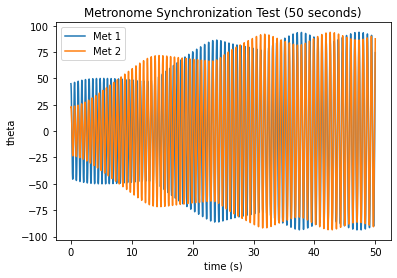

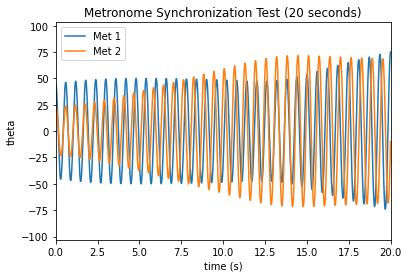

In [4]:
#set up constants
theta0 = 45*np.pi/180   # 45 degrees
omega = 10.9   # all constants taken from paper
gamma = 0.025
delta = .001 #(omega_1 - omega_2)/omega
beta = 0.011 #(m*r_cm)/(M+2*m)*(r_cm*m/I)
mu = 0.01


def twomet2(s,t):  # system of derivatives for ODE
    theta1 = s[0]
    dtheta1 = s[1]
    theta2 = s[2]
    dtheta2 = s[3]
    mdivisor1 = (1-beta*np.cos(theta1)**2)  # broken into pieces
    mdivisor2 = (1-beta*np.cos(theta2)**2)
    dtau_bit = np.sin(theta1)*dtheta1**2+np.sin(theta2)*dtheta2**2
    parta = (-(1+delta)*np.sin(theta1)-mu*((theta1/theta0)**2-1)*dtheta1 
           - beta*np.cos(theta1)*dtau_bit)
    partb = (-(1-delta)*np.sin(theta2)-mu*((theta2/theta0)**2-1)*dtheta2 
           - beta*np.cos(theta2)*dtau_bit)/mdivisor2
    partc = (parta + beta*np.cos(theta1)*np.cos(theta2)*partb)/mdivisor1    
    divisor = (1 - beta**2*(np.cos(theta1)**2*np.cos(theta2)**2/mdivisor1/mdivisor2))
    d2theta2 = partc/divisor                    
    return(dtheta1,
          d2theta2,
           dtheta2,
          (partb+beta*np.cos(theta2)*np.cos(theta1)*d2theta2/mdivisor2))
    
s_initial = [theta0,0,theta0/2,0.1]  # initial conditions of system

tmin = 0  # time to examine
tmax = 50
nts = 10000
taumin = tmin*omega
taumax = tmax*omega

tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)  # solve system

t = tau/omega 

py.plot(t, s[:,0]*180/np.pi, label = "Met 1")  # plot
py.plot(t, s[:,2]*180/np.pi, label = "Met 2")
py.xlabel("time (s)")
py.ylabel("theta")
py.legend()
py.title("Metronome Synchronization Test (50 seconds)")
py.show()

py.plot(t, s[:,0]*180/np.pi, label = "Met 1")  # plot shorter time (easier to see when it syncs or not)
py.plot(t, s[:,2]*180/np.pi, label = "Met 2")
py.xlim(0,20)
py.xlabel("time (s)")
py.ylabel("theta")
py.legend()
py.title("Metronome Synchronization Test (20 seconds)")
py.show()


## Determining when the metronomes synchronize


It is difficult to just look at the graphs and determine when, exactly, the metronomes have reached phase or anti-phase synchronization. In order to see this more clearly, we can look at the sum of the angles of both metronomes and the difference between the angles. When the angles of the metronome are subtracted from each other, the difference should be 0 when they are exactly in phase. When the angles are added, the sum should be 0 when the metronomes are at opposite angles from each other, or in anti-phase synchronization.

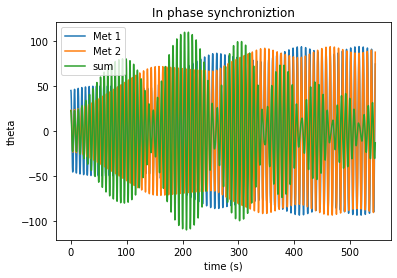

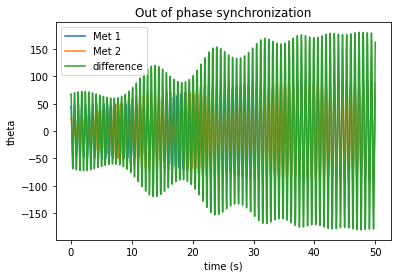

In [5]:
# in phase synchronization (this is 0)
py.plot(tau, s[:,0]*180/np.pi, label = "Met 1")
py.plot(tau, s[:,2]*180/np.pi, label = "Met 2")
py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi, label = "sum")
py.xlabel("time (s)")
py.ylabel("theta")
py.title("In phase synchroniztion")
py.legend()
py.show()

# out of phase synchronization (this is 0)
py.plot(t, s[:,0]*180/np.pi, label = "Met 1")
py.plot(t, s[:,2]*180/np.pi, label = "Met 2")
py.plot(t, s[:,0]*180/np.pi+s[:,2]*180/np.pi, label = "difference")
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Out of phase synchronization")
py.legend()
py.show()

## Finding Accurate Starting Conditions

In this problem, we are examining two metronomes that start so that they are out of sync. However, when we give it a starting condition, we have to give it the starting positions and velocities for both metronomes ($\theta_1$, $\theta_2$ $\frac{d \theta_1}{dt}$, and $\frac{d \theta_2}{dt}$). In order to accurately model the problem, we want the metronomes to have the proper values for $\frac{d \theta_1}{dt}$ and $\frac{d \theta_2}{dt}$ so that they appear offset from each other, and one doesn't start with more energy than the other, as shown above.

To do this, I modelled just one metronome, with a $\theta_0$ of 45 degrees. The metronome started at a 45 degree angle with no initial velocity. Using this model, I was able to find what value of $\frac{d \theta}{dt}$ a metronome with a starting angle of $\theta$ would need to have the same amount of energy as the original metronome.

These were the equations of two metronomes:

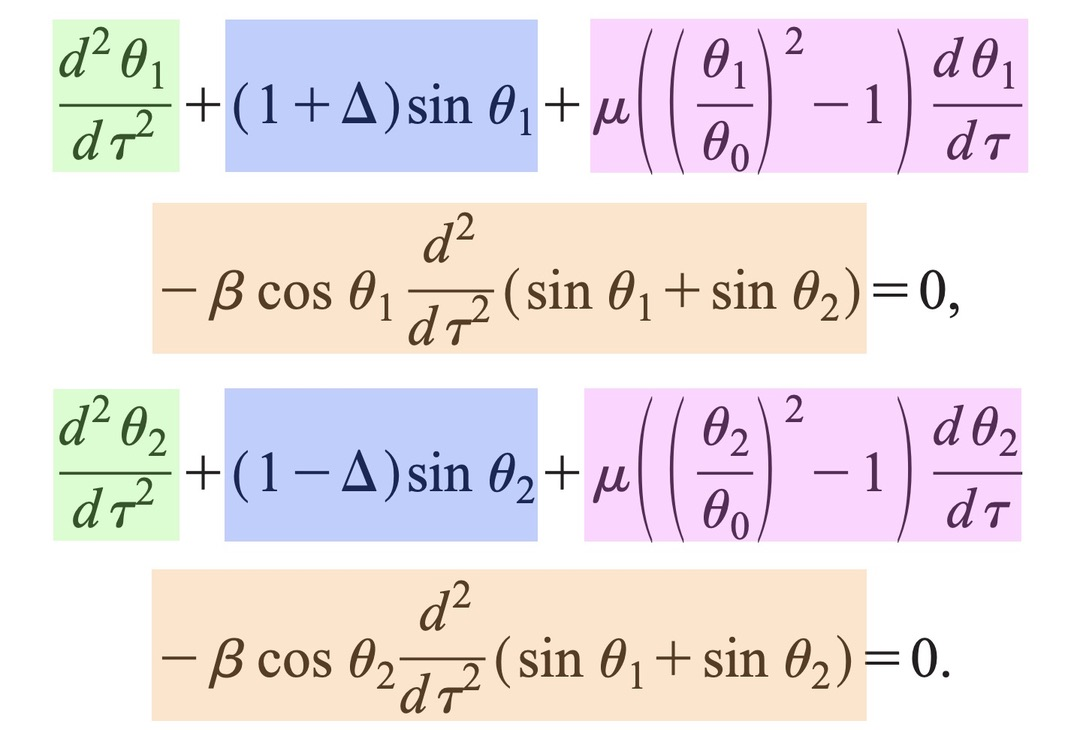

$$
\begin{align}
\frac{d^2 \theta_1}{d\tau^2} + (1 + \Delta) \sin\theta_1 + \mu \left( \left( \frac{\theta_1}{\theta_0}\right)^2 - 1\right) \frac{d\theta_1}{d\tau} - \beta \cos \theta_1 \frac{d^2}{d\tau^2}\left( \sin \theta_1 + \sin \theta_2\right) = 0 \\
\frac{d^2 \theta_2}{d\tau^2} + (1 + \Delta) \sin\theta_2 + \mu \left( \left( \frac{\theta_2}{\theta_0}\right)^2 - 1\right) \frac{d\theta_2}{d\tau} - \beta \cos \theta_2 \frac{d^2}{d\tau^2}\left( \sin \theta_1 + \sin \theta_2\right) = 0 \\
\end{align}
$$

Since I was only using one metronome, I ignored the second equation. The fourth term, for force due to the base, became 0. In addition, I allowed $\Delta$ to be 0, since the metronome shohuld oscillate at the natural frequency, and set $\mu$ to 0, to ignore damping. 

This gave the simple looking second order ODE: $\frac{d^2\theta_1}{d{\tau}^2} + \sin{\theta_1} = 0$. However, since the terms are not linear, the analytic solution was very complex. With the model, I approximated it as a sinusoidal cosine function.

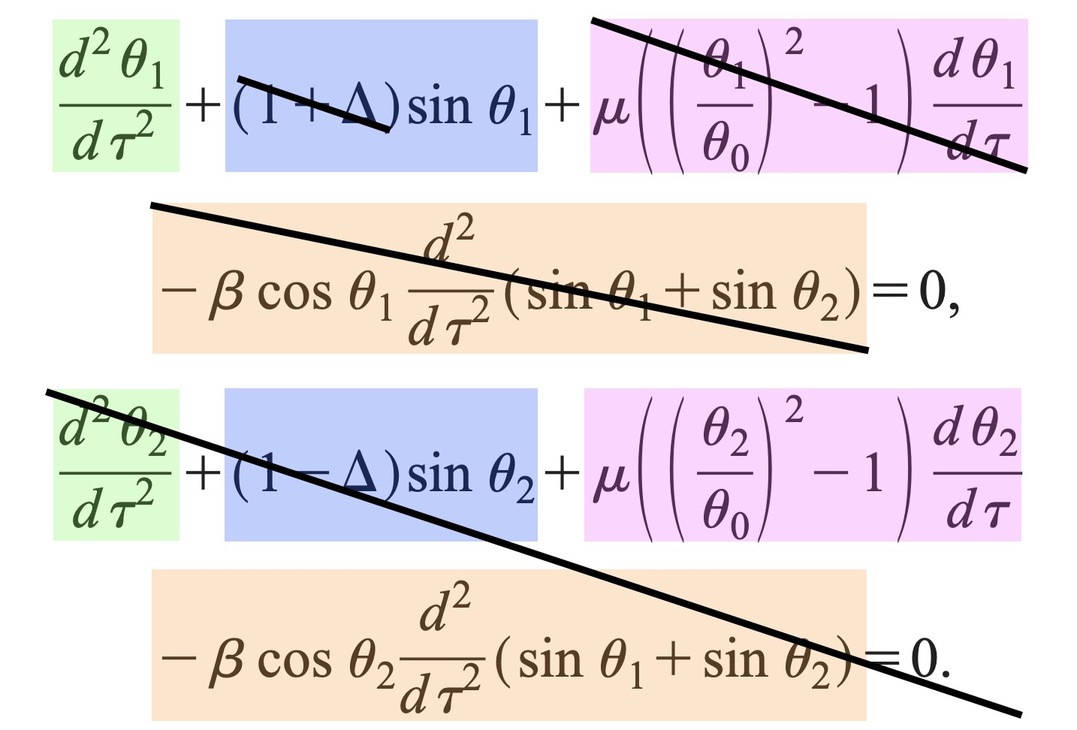


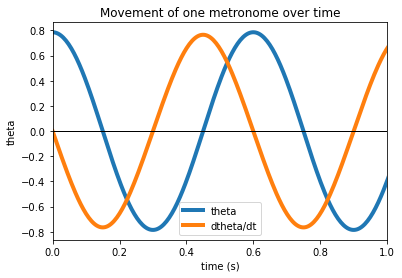

In [6]:
def singlemet(s, t):
    theta1 = s[0]
    dtheta1 = s[1]
    return(dtheta1, -np.sin(theta1))#+mu*((theta1/theta0)**2-1)*dtheta1)

theta0 = 45*np.pi/180
tmin = 0
tmax = 4
nts = 1000
mu = 0#0.01
s_initial = [theta0,0]


taumin = tmin*omega
taumax = tmax*omega
tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, singlemet)

t = tau/omega 
position = s[:,0]
velocity = s[:,1]

py.plot(t, position, linewidth = 4, label = 'theta')
py.plot(t, velocity, label = 'dtheta/dt', linewidth = 4)
py.plot(t,np.zeros(len(t)), 'k', linewidth = 1)
py.xlim(0,1)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Movement of one metronome over time")
py.legend()
py.show()


The computational solution to the ODE for both $\theta$ and $\frac{d \theta}{dt}$ was approximated as the function $A \cos(\omega t + \phi) $.

Parameters for theta: [ 7.87993976e-01  1.04810391e+01 -4.06036893e-05]
Parameters for dtheta/dt: [-0.75760607 10.48116705 -1.57131714]


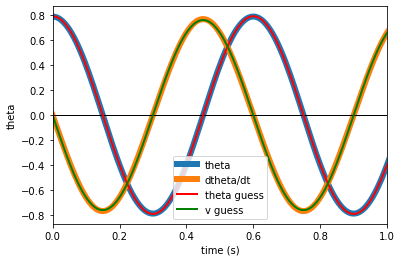

In [7]:
def cosfunc(t,A,omega, phi):  # function for approximation
    return(A*np.cos(omega*t+phi))

p_t_guess = [45*np.pi/180,10.5,0]
p_v_guess = [45*np.pi/180, 10.5, -1.678]
par_t, con_t = curve_fit(cosfunc,t, position, p0 = p_t_guess)
par_v, con_v = curve_fit(cosfunc,t, velocity, p0 = p_v_guess)

print("Parameters for theta:", par_t)
print("Parameters for dtheta/dt:", par_v)

py.plot(t, position, linewidth = 6, label = 'theta')   # plot lines and guess over them
py.plot(t, velocity, label = 'dtheta/dt', linewidth = 6)
py.plot(t,np.zeros(len(t)), 'k', linewidth = 1)
py.plot(t,cosfunc(t, par_t[0], par_t[1], par_t[2]), 'r', linewidth = 2, label = "theta guess")
py.plot(t,cosfunc(t, par_v[0], par_v[1], par_v[2]), 'g', linewidth = 2, label = "v guess")
py.xlim(0,1)
py.xlabel("time (s)")
py.ylabel("theta")
py.legend()
py.show()

Now we have two equations:
$$
\begin{aligned}
\theta &= 0.7880\cos(10.48 t) \\
\frac{d\theta}{dt} &= -0.7576\cos(10.48 t - \frac{\pi}{2})
\end{aligned}
$$

We want one equation that outputs a starting $\frac{d\theta}{dt}$ for a given $\theta$. We can solve this system and simplify to find $\frac{d\theta}{dt} = -0.7576\sin \left[ \cos^{-1}\left({\frac{\theta}{0.7880}}\right) \right]$. This is great, but it only works for values of $-0.7880 \leq \theta \leq 0.7880$. These values are very close to $\frac{\pi}{4}$ and $-\frac{\pi}{4}$, which was our original value for $\theta$, so I simplified the velocity function by using $\theta$ instead of the other value.


In [8]:
def velocity_i(theta1):
    amp1 = 45*np.pi/180  # need this in radians not degrees 
    amp2 = 0.7576   # value from curve fit
    if theta1 == np.pi/2:  # pi/2 doesn't work, but -pi/2 does
        theta1 = -np.pi/2
    if theta1 < amp1 and theta1 > -amp1 or theta1 == -amp1:   # different cases (-45 to 45 degrees)
        return(amp2*np.sin(np.arccos(theta1/amp1)))
    elif theta1 < 0 :    #  (-90 to -45 degrees)
        theta1 = (theta1 % (amp1))
        return(-amp2*np.sin(np.arccos(theta1/amp1)))
    else:    # (45 degrees to 90 degrees)
        theta1 = theta1 % (amp1)
        theta1 = np.pi/4 - theta1
        return(-amp2*np.sin(np.arccos(theta1/amp1)))

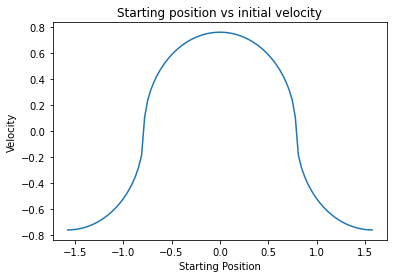

In [9]:
#check that we get values we want

t_list = np.linspace(-np.pi/2, np.pi/2, 100)  # list of places to check
v_list = []

for theta in t_list:  # evaluate at each starting position
    v_list.append(velocity_i(theta))
    
py.plot(t_list,v_list)
py.xlabel("Starting Position")
py.ylabel("Velocity")
py.title("Starting position vs initial velocity")
py.show()

This matches with what we want to see from the function. When it starts at 0, it should have the highest velocity. At $\frac{\pi}{4}$ and $-\frac{\pi}{4}$ it is at the maximum value, so the velocity is 0. At $\frac{\pi}{2}$ and $-\frac{\pi}{2}$ the function is starting at 0 but going in the other direction, so it has the highest negative value. This also complicates our initial starting position. When we start at $\frac{\pi}{2}$, we want the metronome to be at 0, just going the other direction.

In [10]:
def initial(theta0, theta1):  # determine initial direction and velocity
    v_i = velocity_i(theta1)  # velocity first (needs correct theta1)
    if theta1 > theta0:   # change starting location
        theta1 = 2*theta0 - theta1
    elif theta1< -1*theta0:
        theta1 = -1*theta1-2*theta0
    return(theta1, v_i)

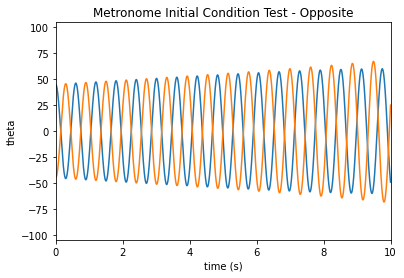

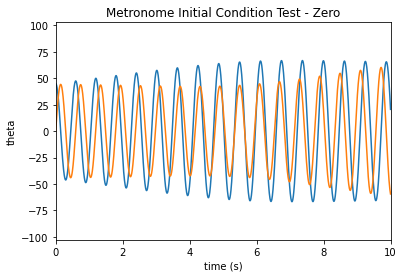

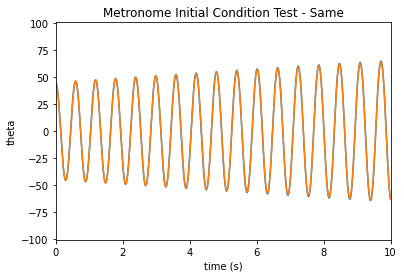

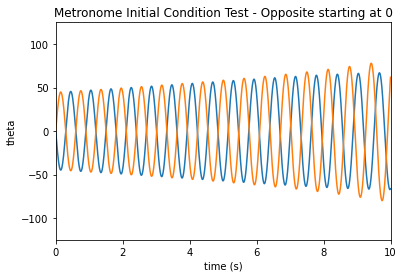

In [11]:
# testing code from above
theta0 = 45*np.pi/180   # 45 degrees
omega = 10.9   # all constants taken from paper
gamma = 0.025
delta = .001 #(omega_1 - omega_2)/omega
beta = 0.011 #(m*r_cm)/(M+2*m)*(r_cm*m/I)
mu = 0.01

theta1 = -theta0
theta1, v_i = initial(theta0, theta1)
s_initial = [theta0,0,theta1, v_i]  # initial conditions of system

tmin = 0  
tmax = 50
nts = 10000
taumin = tmin*omega
taumax = tmax*omega
tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)  # solve system

t = tau/omega 

py.plot(t, s[:,0]*180/np.pi)  # plot
py.plot(t, s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Metronome Initial Condition Test - Opposite")
py.xlim(0,10)
py.show()

theta1 = 0
theta1, v_i = initial(theta0, theta1)
s_initial = [theta0,0,theta1, v_i]  # initial conditions of system
tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)  # solve system
py.plot(t, s[:,0]*180/np.pi)  # plot
py.plot(t, s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Metronome Initial Condition Test - Zero")
py.xlim(0,10)
py.show()

theta1 = theta0
theta1, v_i = initial(theta0, theta1)
s_initial = [theta0,0,theta1, v_i]  # initial conditions of system
tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)  # solve system
py.plot(t, s[:,0]*180/np.pi)  # plot
py.plot(t, s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Metronome Initial Condition Test - Same")
py.xlim(0,10)
py.show()

theta0 = -np.pi/2
theta1 = 0
theta1, v_i0 = initial(np.pi/4, theta0)
theta2, v_i = initial(np.pi/4, theta1)
s_initial = [theta1,v_i0,theta2, v_i]  # initial conditions of system
tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)  # solve system
py.plot(t, s[:,0]*180/np.pi)  # plot
py.plot(t, s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Metronome Initial Condition Test - Opposite starting at 0")
py.xlim(0,10)
py.ylim(-125,125)
py.show()

The function works! The metronomes appear to start at roughly the same height. Now our intial conditions for synchronization start more naturally.

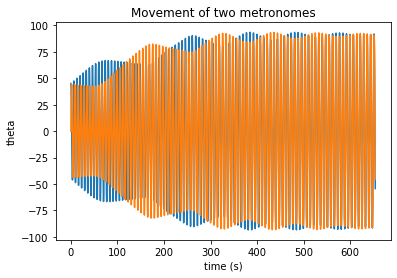

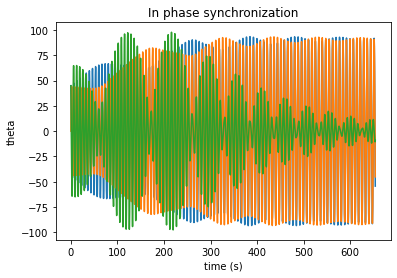

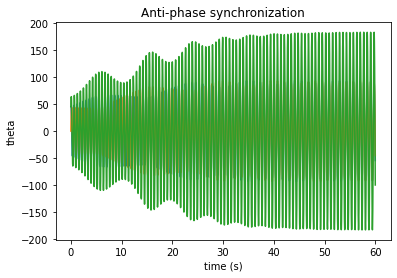

In [12]:
tmin = 0
tmax = 60
nts = 10000
theta0 = 45*np.pi/180
theta1 = 0*theta0
omega = 10.9
gamma = 0.025
delta = .001 #(omega_1 - omega_2)/omega
beta = 0.011 #(m*r_cm)/(M+2*m)*(r_cm*m/I)
mu = 0.01

theta1, v_i = initial(theta0, theta1)
s_initial = [theta0,0,theta1, v_i]  # initial conditions of system

taumin = tmin*omega
taumax = tmax*omega

tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)

t = tau/omega 

py.plot(tau, s[:,0]*180/np.pi)
py.plot(tau, s[:,2]*180/np.pi)
#py.xlim(0,100)
#py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Movement of two metronomes")
py.show()


# in phase synchronization (this is 0)
py.plot(tau, s[:,0]*180/np.pi)
py.plot(tau, s[:,2]*180/np.pi)
py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("In phase synchronization")
py.show()

# out of phase synchronization (this is 0)
py.plot(t, s[:,0]*180/np.pi)
py.plot(t, s[:,2]*180/np.pi)
py.plot(t, s[:,0]*180/np.pi+s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Anti-phase synchronization")
py.show()

## Determining when the metronomes synchronize Pt 2

When the metronomes synchronize in anti-phase, then the sum of their motions should be 0. If there is phase synchronization then the difference of their motions should be 0. Since they oscillate, the both of these pass 0 rather frequently. Thus, we can't look at when they functions are equal to 0. However, if we look at when the functions are close to 0 a long period of time, we can find when they synchronize. The function I built for determines when the maximum over the next few seconds is less than a predetermined value.

In [13]:
def synctime(sumlist, differencelist, tlist, tlength, breakmax):  
    for it, t in enumerate(tlist):   
        if it+t < len(tlist)-1:  
            tempsum = sumlist[it:int(it+tlength)]   # creates list of sum and difference for a set number of seconds
            tempdiff = differencelist[it:int(it+tlength)]
            if max(tempsum) < breakmax:   # if max over time frame is less certain value it is in sync (anti-phase)
                return(t, "antiphase")
            if max(tempdiff) < breakmax:  # if max over time frame is less certain value it is in sync (phase)
                return(t, "phase")
    return(np.nan, "none")


none
nan


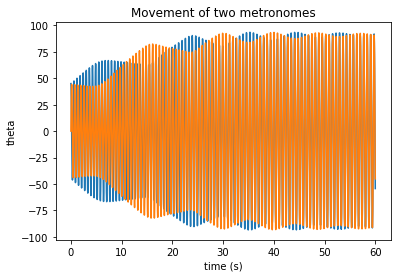

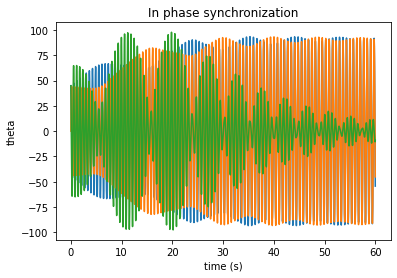

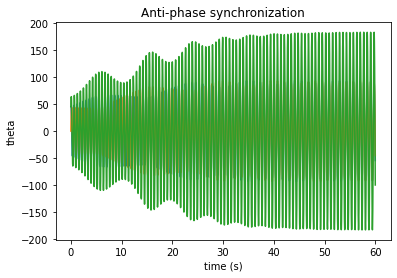

In [14]:
# test
s1 = s[:,0]*180/np.pi  # using values from previous test 
s2 = s[:,2]*180/np.pi
dt = (tmax-tmin)/nts

seconds = 3  # 3 seconds
synct, synctype = synctime(s1+s2, s1-s2,t, seconds/dt, 1)  # only one degree apart when in sync
print(synctype)
print(synct)

#plot motion and synchronization
py.plot(t, s[:,0]*180/np.pi)
py.plot(t, s[:,2]*180/np.pi)
py.plot(synct, 0, 'o')
#py.xlim(0,50)
#py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Movement of two metronomes")
py.show()


# in phase synchronization (this is 0)
py.plot(t, s[:,0]*180/np.pi)
py.plot(t, s[:,2]*180/np.pi)
py.plot(t, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
py.xlabel("time (s)")
py.ylabel("theta")
py.title("In phase synchronization")
#py.xlim(20,30)
py.plot(synct, 0, 'o')
py.show()

# out of phase synchronization (this is 0)
py.plot(t, s[:,0]*180/np.pi)
py.plot(t, s[:,2]*180/np.pi)
py.plot(t, s[:,0]*180/np.pi+s[:,2]*180/np.pi)
py.plot(synct, 0, 'o')
py.xlabel("time (s)")
py.ylabel("theta")
py.title("Anti-phase synchronization")

#py.xlim(0,10)

py.show()

## Finding Accurate Starting Conditions Pt 2: Varying $\theta_0$

In order to examine if varying $\theta_0$ of the metronomes changes synchronization of the function, we need to have accurate starting conditions for all values of theta. I created a function to perform the same curve fit as above and find the velocity of the amplitude, since this is the only thing that should really change.

In [15]:
def find_v_amp(theta0,omega):
    tmin = 0
    tmax = 1
    nts = 500
    mu = 0
    taumin = tmin*omega
    taumax = tmax*omega
    s_initial = [theta0,0]
    tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, singlemet)
    t = tau/omega 
    velocity = s[:,1]
    p_v_guess = [theta0,10.5,-1.507]
    par_v, con_v = curve_fit(cosfunc,t, velocity, p0 = p_v_guess)
    return(-par_v[0])

In order to speed up the calling of this function, I plotted the amplitude of the velocity for many values of $\theta_0$, then fit a straight line to it. This allowed me to make a function that quickly approximates the initial velocity, without performing an entire curve fit for each new $\theta_0$.

[0.96806834 0.00568436]


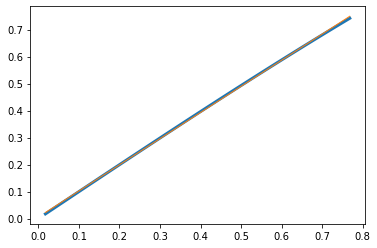

In [16]:
thetalist = np.arange(1,45,1)*np.pi/180
v_test_list = []
for theta in thetalist:
    v_test_list.append(find_v_amp(theta,omega))

def linefunc(x,A,B):
    return(A*x+B)

par_speed, con_speed = curve_fit(linefunc,thetalist, v_test_list)
print(par_speed)
py.plot(thetalist,v_test_list, linewidth = 3)
py.plot(thetalist,par_speed[0]*thetalist+par_speed[1], linewidth = 1)
py.show()

In [17]:
def v_amp(theta0):   # theta in radians
    return(0.96806834*theta0+0.00568436)  # approximates amplitude of velocity

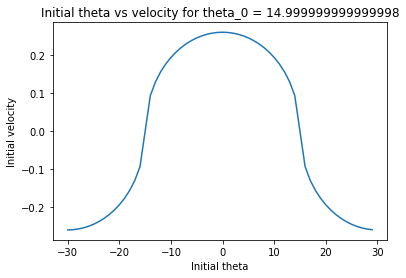

In [18]:
def velocity_i2(theta0,theta1):   # velocity for any value of theta_0
        amp1 = theta0  # need this in radians not degrees 
        amp2 = v_amp(theta0)
        if theta1 == 2*theta0:
            theta1 = -2*theta0
        if theta1 < amp1 and theta1 > -amp1 or theta1 == amp1 or theta1 == -amp1:   # different cases (-45 to 45 degrees)
            return(amp2*np.sin(np.arccos(theta1/amp1)))
        elif theta1 < 0 :    #  (-90 to -45 degrees)
            theta1 = -1*(theta1 % (amp1))
            return(-amp2*np.sin(np.arccos(theta1/amp1)))
        else:    # (45 degrees to 90 degrees)
            theta1 = theta1 % (amp1)
            theta1 = amp1 - theta1
            return(-amp2*np.sin(np.arccos(theta1/amp1)))

# test
thetalist = np.arange(-30,30,1)*np.pi/180
storelist = []
theta1 = 15*np.pi/180
for theta in thetalist:
    storelist.append(velocity_i2(theta1,theta))
    
py.plot(thetalist/(np.pi/180), storelist)
py.xlabel("Initial theta")
py.ylabel("Initial velocity")
py.title("Initial theta vs velocity for theta_0 = "+str(theta1*180/np.pi))
py.show()

In [19]:
def initial2(theta0,theta1):  # intial condition function using new velocity_i2 function
    v_i = velocity_i2(theta0, theta1)
    if theta1 > theta0:
        theta1 = 2*theta0 - theta1
    elif theta1< -1*theta0:
        theta1 = -1*theta1-2*theta0
    return(theta1, v_i)

## Fun with Parameters and Initial Conditions - Interactive Widgets

In [64]:
def twometplot(omega,delta,beta,mu,theta1,t_int,graph, tau_t):
    omega = omega
    delta = delta
    beta = beta
    mu = mu
    theta0 = 45*np.pi/180
    theta1 = theta1*theta0
    if tau_t == 't':
        tmin = 0
        tmax = t_int[1]
        taumin = tmin*omega
        taumax = tmax*omega
    else:
        tmin = 0
        taumax = t_int[1]*10.9
        tmax = taumax/omega
        taumin = 0
        
    theta1, v_i = initial(theta0, theta1)
    s_initial = [theta0,0,theta1, v_i]  # initial conditions of system



    def twomet2(s,t):  # system of derivatives for ODE
        theta1 = s[0]
        dtheta1 = s[1]
        theta2 = s[2]
        dtheta2 = s[3]
        mdivisor1 = (1-beta*np.cos(theta1)**2)  # broken into pieces
        mdivisor2 = (1-beta*np.cos(theta2)**2)
        dtau_bit = np.sin(theta1)*dtheta1**2+np.sin(theta2)*dtheta2**2
        parta = (-(1+delta)*np.sin(theta1)-mu*((theta1/theta0)**2-1)*dtheta1 
               - beta*np.cos(theta1)*dtau_bit)
        partb = (-(1-delta)*np.sin(theta2)-mu*((theta2/theta0)**2-1)*dtheta2 
               - beta*np.cos(theta2)*dtau_bit)/mdivisor2
        partc = (parta + beta*np.cos(theta1)*np.cos(theta2)*partb)/mdivisor1    
        divisor = (1 - beta**2*(np.cos(theta1)**2*np.cos(theta2)**2/mdivisor1/mdivisor2))
        d2theta2 = partc/divisor                    
        return(dtheta1,
              d2theta2,
               dtheta2,
              (partb+beta*np.cos(theta2)*np.cos(theta1)*d2theta2/mdivisor2))


    tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)

    t = tau/omega 
    
    s1 = s[:,0]*180/np.pi
    s2 = s[:,2]*180/np.pi
    dt = (tmax-tmin)/nts
    seconds = 3
    
    def synctime(sumlist, differencelist, tlist, tlength, breakmax):  
        for it, t in enumerate(tlist):   
            if it+t < len(tlist)-1:  
                tempsum = sumlist[it:int(it+tlength)]   # creates list of sum and difference for a set number of seconds
                tempdiff = differencelist[it:int(it+tlength)]
                if max(tempsum) < breakmax:   # if max over time frame is less certain value it is in sync (anti-phase)
                    return(t, "antiphase")
                if max(tempdiff) < breakmax:  # if max over time frame is less certain value it is in sync (phase)
                    return(t, "phase")
        return(np.nan, "none")
    
    if tau_t == 't':
        figure, ax1 = py.subplots(1,1, figsize = (11,6))
        ax1.plot(t, s[:,0]*180/np.pi)
        ax1.plot(t, s[:,2]*180/np.pi)
        if graph == 'In Phase sync':
            ax1.plot(t, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        if graph == 'Anti-phase sync':
            ax1.plot(t, s[:,0]*180/np.pi+s[:,2]*180/np.pi)
        py.xlim(t_int[0],tmax)
        #py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        ax1.set_xlabel("time (s)")
        ax1.set_ylabel("theta")
        ax1.set_title("Movement of two metronomes")
        py.show()
    else: 
        figure, ax1 = py.subplots(1,1, figsize = (11,6))
        ax1.plot(tau, s[:,0]*180/np.pi)
        ax1.plot(tau, s[:,2]*180/np.pi)
        if graph == 'In Phase sync':
            ax1.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        if graph == 'Anti-phase sync':
            ax1.plot(tau, s[:,0]*180/np.pi+s[:,2]*180/np.pi)
        py.xlim(t_int[0]*omega,tmax*omega)
        #py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        ax1.set_xlabel("tau")
        ax1.set_ylabel("theta")
        ax1.set_title("Movement of two metronomes")
        py.show()
    
    synct, synctype = synctime(s1+s2, s1-s2,t, seconds/dt, 2)
    print(synctype, ":", synct, "seconds")


    
graph_pick = widgets.ToggleButtons(value = 'none', options = ['In Phase sync', 'Anti-phase sync', 'none'], disabled = False)
t_tau = widgets.ToggleButtons(options = ['t', 'tau'], disabled = False)
theta1_slider = widgets.FloatSlider(value = 0, min = -2, max = 2, step = 0.01, description = '% offset:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True)
beta_slider = widgets.FloatSlider(value = 0.011, min = 0.001, max = 0.02, step = 0.001, description = 'beta:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True, readout_format='.3f')
mu_slider = widgets.FloatSlider(value = 0.01, min = 0.005, max = 0.02, step = 0.001, description = 'mu:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True, readout_format='.3f')
delta_slider = widgets.FloatSlider(value = 0.001, min = 0.001, max = 0.01, step = 0.001, description = 'delta:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True, readout_format='.3f')
omega_slider = widgets.FloatSlider(value = 10.9, min = 1, max = 20, step = 0.01, description = 'omega:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True)
t_max_slider = widgets.IntRangeSlider(value=[0,60], min = 0, max=200, step = 1, description = 'Time/tau limit:', readout = True, continuous_update = False)
ui1 = widgets.VBox([beta_slider, mu_slider, delta_slider])
ui2 = widgets.VBox([graph_pick, t_tau, beta_slider, mu_slider, delta_slider, omega_slider, theta1_slider, t_max_slider])


out2 = widgets.interactive_output(twometplot, {'omega': omega_slider, 'delta': delta_slider, 'beta': beta_slider, 'mu': mu_slider,
                                               'theta1': theta1_slider, 't_int': t_max_slider, 'graph' :graph_pick, 'tau_t': t_tau})
display(widgets.HBox([out2, ui2]))


In [65]:
# vary theta0!

def twometplot_theta(omega,delta,beta,mu,theta0,theta1,t_int,graph, tau_t):
    omega = omega
    delta = delta
    beta = beta
    mu = mu
    theta0 = theta0*np.pi/180
    theta1 = theta1*theta0
    if tau_t == 't':
        tmin = 0
        tmax = t_int[1]
        taumin = tmin*omega
        taumax = tmax*omega
    else:
        tmin = 0
        taumax = t_int[1]*10.9
        tmax = taumax/omega
        taumin = 0
    
    def v_amp(theta0):   # theta in radians
        return(0.96806834*theta0+0.00568436)
    
    def velocity_i2(theta0,theta1):
        amp1 = theta0  # need this in radians not degrees 
        amp2 = v_amp(theta0)
        if theta1 == 2*theta0:
            theta1 = -2*theta0
        if theta1 < amp1 and theta1 > -amp1 or theta1 == amp1 or theta1 == -amp1:   # different cases (-45 to 45 degrees)
            return(amp2*np.sin(np.arccos(theta1/amp1)))
        elif theta1 < 0 :    #  (-90 to -45 degrees)
            theta1 = -1*(theta1 % (amp1))
            return(-amp2*np.sin(np.arccos(theta1/amp1)))
        else:    # (45 degrees to 90 degrees)
            theta1 = theta1 % (amp1)
            theta1 = amp1 - theta1
            return(-amp2*np.sin(np.arccos(theta1/amp1)))
        
    def initial2(theta0,theta1):
        v_i = velocity_i2(theta0, theta1)
        if theta1 > theta0:
            theta1 = 2*theta0 - theta1
        elif theta1< -1*theta0:
            theta1 = -1*theta1-2*theta0
        return(theta1, v_i)
    
    
    theta1, v_i = initial2(theta0, theta1)
    s_initial = [theta0,0,theta1,v_i]


    def twomet2(s,t):  # system of derivatives for ODE
        theta1 = s[0]
        dtheta1 = s[1]
        theta2 = s[2]
        dtheta2 = s[3]
        mdivisor1 = (1-beta*np.cos(theta1)**2)  # broken into pieces
        mdivisor2 = (1-beta*np.cos(theta2)**2)
        dtau_bit = np.sin(theta1)*dtheta1**2+np.sin(theta2)*dtheta2**2
        parta = (-(1+delta)*np.sin(theta1)-mu*((theta1/theta0)**2-1)*dtheta1 
               - beta*np.cos(theta1)*dtau_bit)
        partb = (-(1-delta)*np.sin(theta2)-mu*((theta2/theta0)**2-1)*dtheta2 
               - beta*np.cos(theta2)*dtau_bit)/mdivisor2
        partc = (parta + beta*np.cos(theta1)*np.cos(theta2)*partb)/mdivisor1    
        divisor = (1 - beta**2*(np.cos(theta1)**2*np.cos(theta2)**2/mdivisor1/mdivisor2))
        d2theta2 = partc/divisor                    
        return(dtheta1,
              d2theta2,
               dtheta2,
              (partb+beta*np.cos(theta2)*np.cos(theta1)*d2theta2/mdivisor2))

    taumin = tmin*omega
    taumax = tmax*omega

    tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)

    t = tau/omega 
    
    s1 = s[:,0]*180/np.pi
    s2 = s[:,2]*180/np.pi
    dt = (tmax-tmin)/nts
    seconds = 3
    
    def synctime(sumlist, differencelist, tlist, tlength, breakmax):  
        for it, t in enumerate(tlist):   
            if it+t < len(tlist)-1:  
                tempsum = sumlist[it:int(it+tlength)]   # creates list of sum and difference for a set number of seconds
                tempdiff = differencelist[it:int(it+tlength)]
                if max(tempsum) < breakmax:   # if max over time frame is less certain value it is in sync (anti-phase)
                    return(t, "antiphase")
                if max(tempdiff) < breakmax:  # if max over time frame is less certain value it is in sync (phase)
                    return(t, "phase")
        return(np.nan, "none")
    
    if tau_t == 't':
        figure, ax1 = py.subplots(1,1, figsize = (11,6))
        ax1.plot(t, s[:,0]*180/np.pi)
        ax1.plot(t, s[:,2]*180/np.pi)
        if graph == 'In Phase sync':
            ax1.plot(t, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        if graph == 'Anti-phase sync':
            ax1.plot(t, s[:,0]*180/np.pi+s[:,2]*180/np.pi)
        py.xlim(t_int[0],tmax)
        #py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        ax1.set_xlabel("time (s)")
        ax1.set_ylabel("theta")
        ax1.set_title("Movement of two metronomes")
        py.show()
    else: 
        figure, ax1 = py.subplots(1,1, figsize = (11,6))
        ax1.plot(tau, s[:,0]*180/np.pi)
        ax1.plot(tau, s[:,2]*180/np.pi)
        if graph == 'In Phase sync':
            ax1.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        if graph == 'Anti-phase sync':
            ax1.plot(tau, s[:,0]*180/np.pi+s[:,2]*180/np.pi)
        py.xlim(t_int[0]*omega,tmax*omega)
        #py.plot(tau, s[:,0]*180/np.pi-s[:,2]*180/np.pi)
        ax1.set_xlabel("tau")
        ax1.set_ylabel("theta")
        ax1.set_title("Movement of two metronomes")
        py.show()
    
    synct, synctype = synctime(s1+s2, s1-s2,t, seconds/dt, 2)
    print(synctype, ":", synct, "seconds")

   
    
theta0_slider = widgets.FloatSlider(value = 45, min = 1, max = 45, step = 0.1, description = 'theta_0:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True)
t_tau = widgets.ToggleButtons(options = ['t', 'tau'], disabled = False)
graph_pick = widgets.ToggleButtons(value = 'none', options = ['In Phase sync', 'Anti-phase sync', 'none'], disabled = False)
theta1_slider = widgets.FloatSlider(value = 0, min = -2, max = 2, step = 0.01, description = '% offset:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True)
beta_slider = widgets.FloatSlider(value = 0.011, min = 0, max = 0.02, step = 0.001, description = 'beta:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True, readout_format='.3f')
mu_slider = widgets.FloatSlider(value = 0.01, min = 0.005, max = 0.02, step = 0.001, description = 'mu:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True, readout_format='.3f')
delta_slider = widgets.FloatSlider(value = 0.001, min = 0, max = 0.01, step = 0.001, description = 'delta:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True, readout_format='.3f')
omega_slider = widgets.FloatSlider(value = 10.9, min = 1, max = 20, step = 0.01, description = 'omega:', desable=False, continuous_update = False, orientation = 'horizontal',readout = True)
t_max_slider = widgets.IntRangeSlider(value=[0,100], min = 0, max=200, step = 1, description = 'Time:', readout = True, continuous_update = False)
ui1 = widgets.VBox([beta_slider, mu_slider, delta_slider])
ui2 = widgets.VBox([graph_pick, t_tau, beta_slider, mu_slider, delta_slider, omega_slider, theta0_slider, theta1_slider, t_max_slider])


out2 = widgets.interactive_output(twometplot_theta, {'omega': omega_slider, 'delta': delta_slider, 'beta': beta_slider, 'mu': mu_slider,
                                               'theta0':  theta0_slider, 'theta1': theta1_slider, 't_int': t_max_slider, 'graph' :graph_pick, 'tau_t': t_tau})
display(widgets.HBox([out2, ui2]))


## Graphs!


In [47]:
def sync_from_param(omega,delta,beta,mu,theta1,tmin,tmax,nts):  # theta0 = 45 degrees for this one
    theta0 = 45*np.pi/180
    theta1 = theta1*theta0
    tmin = 0
    taumin = tmin*omega
    taumax = tmax*omega
    
    theta1, v_i = initial(theta0, theta1)
    s_initial = [theta0,0,theta1, v_i]  # initial conditions of system
    tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)
    t = tau/omega 
    
    s1 = s[:,0]*180/np.pi
    s2 = s[:,2]*180/np.pi
    dt = (tmax-tmin)/nts
    seconds = 2
    synct, synctype = synctime(s1+s2, s1-s2,t, seconds/dt, 1)
    return(synct)

In [156]:
omega = 10.9   # constants from paper
gamma = 0.025
delta = .001 
beta = 0.011
mu = 0.01

tmin= 0
tmax = 120

thetalist = np.linspace(-2,2,61)
storelist1 = []
for theta in thetalist:
    storelist1.append(sync_from_param(omega,delta,beta,mu,theta,tmin,tmax,nts))

This graph shows how the time it take to synchronize changes based on the difference between the initial angles of the two metronomes. In both cases, one metronome starts at 45 degrees, while the other starts at some $x*45$ degrees. So at 0, -2, and 2, the second metronome starts at 0 degrees. At 1, the metronomes start in sync, which is why the time to sync is 0. Ad -1, the metronomes start exactly out of phase. Technically, the time to sync shouldn't be 0, because it should eventually come out of anti-phase synchronization and into phase synchronization.

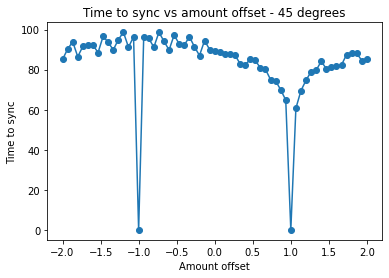

In [158]:
py.plot(thetalist, storelist1, 'o-')
py.xlabel("Amount offset")
py.ylabel("Time to sync")
py.title("Time to sync vs amount offset - 45 degrees")
py.show()

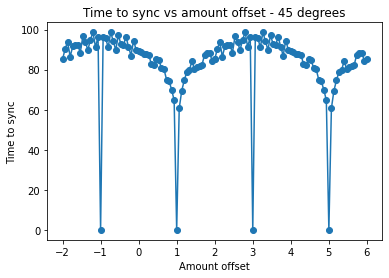

In [171]:
test = np.append(thetalist,thetalist+4)
test2= np.append(storelist1,storelist1)
py.plot(test, test2, 'o-')
py.xlabel("Amount offset")
py.ylabel("Time to sync")
py.title("Time to sync vs amount offset - 45 degrees")
py.show()

In [69]:
def sync_from_param_theta(omega,delta,beta,mu,theta0,theta1,tmin,tmax,nts):  # theta0 != 45 degrees for this one
    theta1 = theta1*theta0
    tmin = 0
    taumin = tmin*omega
    taumax = tmax*omega
    
    theta1, v_i = initial2(theta0, theta1)
    s_initial = [theta0,0,theta1,v_i]
    tau,s = diffeq_solver_from_scipy(s_initial, taumin, taumax, nts, twomet2)
    t = tau/omega 
    
    s1 = s[:,0]*180/np.pi
    s2 = s[:,2]*180/np.pi
    dt = (tmax-tmin)/nts
    seconds = 3
    synct, synctype = synctime(s1+s2, s1-s2,t, seconds/dt, 2)
    return(synct)

In [70]:
thetalist_2 = np.linspace(10,45,36)*np.pi/180
theta1 = 0
tmax = 130
storelist = []
for theta in thetalist_2:
    storelist.append(sync_from_param_theta(omega,delta,beta,mu,theta,theta1,tmin,tmax,nts))

In this graph, I examined how changing the value of $\theta_0$, or the max value that the metronomes have, affects the synchronzation time. In this case, one metronome starts at $\theta_0$, and the other begins at 0. It takes the metronomes more time to synchronize when they have smaller motions, which is very interesting and not quite what I expected, however the graph appears fairly regularly.

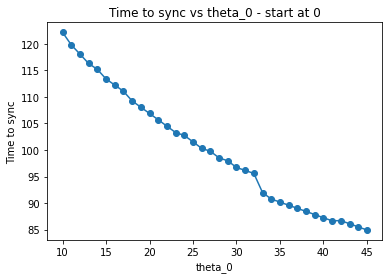

In [71]:
py.plot(thetalist_2*180/np.pi, storelist, 'o-')
py.xlabel("theta_0")
py.ylabel("Time to sync")
py.title("Time to sync vs theta_0 - start at 0")
py.show()


In [144]:
theta0list = np.linspace(10,45,36)*np.pi/180
theta1list = thetalist = np.linspace(-2,2,21)
storelist2 = np.zeros((len(theta0list), len(theta1list)))
tmax = 140
for i, theta0 in enumerate(theta0list):
    for j, theta1 in enumerate(theta1list):
        storelist2[i,j] = (sync_from_param_theta(omega,delta,beta,mu,theta0,theta1,tmin,tmax,nts))
    print(i, len(theta0list))   

0 36
1 36
2 36
3 36
4 36
5 36
6 36
7 36
8 36
9 36
10 36
11 36
12 36
13 36
14 36
15 36
16 36
17 36
18 36
19 36
20 36
21 36
22 36
23 36
24 36
25 36
26 36
27 36
28 36
29 36
30 36
31 36
32 36
33 36
34 36
35 36


The following colormap shows how the previously examined variables work together to affect the synchronization time of the system. It takes a very long time to get all of the data for the entire thing. The data appears much more dependent on the amount that it is offset than it does the value of $\theta_0$.

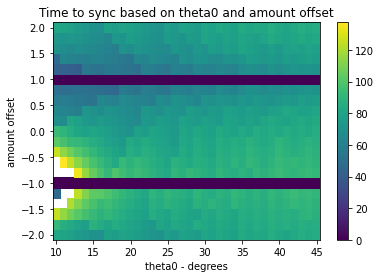

In [145]:
fig, ax = py.subplots()
storelist3 = np.transpose(storelist2)
ax.pcolor(theta0list*180/np.pi,theta1list,storelist3,cmap='viridis', shading = 'nearest')
fig.colorbar(ax.pcolor(theta0list*180/np.pi, theta1list,storelist3, cmap='viridis', shading='nearest'),ax=ax)
py.xlabel("theta0 - degrees")
py.ylabel("amount offset")
py.title("Time to sync based on theta0 and amount offset")
py.show()